<a href="https://colab.research.google.com/github/youneseltrach/ML_algo/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### 1) Linear regression with one variable



1.1) **computing cost**
> The cost function (loss function) allows us to return the average error between predictions outcomes and the actual outcomes.

> The equation for cost with one variable is:
  $$J(w,b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})^2$$ 

> where 
$$f_{w,b}(x^{(i)}) = wx^{(i)} + b$$

- $m$ number of training example
- $x$ input variable / feature
- $y$ output variable / target
- $(x,y)$ one training example
- $(x^{i},y^{i})$ $i$ row
- $f_{w,b}(x^{(i)})$ is our prediction for example $i$ using parameters $w,b$.  
- $(f_{w,b}(x^{(i)}) -y^{(i)})^2$ is the squared difference between the target value and the prediction.   
- These differences are summed over all the $m$ examples and divided by `2m` to produce the cost, $J(w,b)$.  

In [6]:
#cost function
def cost_function (x,y,w,b):
  
  m = x.shape[0] # number of training example

  cost = 0.

  for i in range (m):
    fun = w*x[i] + b # define the hypothesis or function predictor
    err = (fun - y[i])
    cost += cost + err**2

  cost = 1/( 2*m) * cost

  return cost

1.2) **Gradient descent**

> Gradient descent used for minimazing the cost function and was described as:

$$\begin{align*} \text{repeat}&\text{ until convergence:} \; \lbrace \newline
\;  w &= w -  \alpha \frac{\partial J(w,b)}{\partial w}  \; \newline 
 b &= b -  \alpha \frac{\partial J(w,b)}{\partial b}  \newline \rbrace
\end{align*}$$

> where the gradient is defined as:
$$
\begin{align}
\frac{\partial J(w,b)}{\partial w}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})x^{(i)} \\
  \frac{\partial J(w,b)}{\partial b}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})\\
\end{align}
$$

> For implement the Gradient Descent algorithme, we need tree functions:
*   `calcule_gradient`: to calculate the gradient
*   `cost_function`:  to calculate the cost
*   `gradient_descent`:  utilizing `calcule_gradient` and `cost_function`




In [40]:
# Calculate the gradient
def calcule_gradient (x,y,w,b):
  
  m = x.shape[0] # size of training set
  w_i = 0.
  b_i = 0.

  for i in range (m):
    fun = w*x[i] + b  # hypothesis
    err = fun - y[i]  # error
    w_i += err*x[i]
    b_i += err
  
  w_i = w_i/m
  b_i = b_i/m

  return w_i,b_i

Now, we implemet the function of gradient descent for obtain the optimal values of $w$ and $b$ on the training set


```
Args:
- x: training data
- y: target data
- w,b: initial values
- itr: number of iteration for run the gradient descent
- alpha: learning rate
- cost_function
- calcule_gradient
```



In [167]:
# Implementing the Gradient Descent function
def gradient_descent (x,y,w,b,itr,alpha, cost_function, calcule_gradient):

  p_history = []     # paramerter history of all parameters (w,b)
  cost_history = []  # cost of all the paramerter that changed

  w_i = w
  b_i = b

  for i in range (itr):

    w_g,b_g = calcule_gradient(x,y,w_i,b_i)

    w_i = w_i -  alpha * w_g
    b_i = b_i -  alpha * b_g

    # calculate the cost function for this new parameters (w_i,b_i) and save it in cost_history
    cost_history.append((cost_function(x,y,w_i,b_i)))
    # save the new parameters in p_history
    p_history.append ((w_i,b_i))

    # print the cost and the paramter over iteration i
    if i%1000 == 0:
      print (f"i = {i}  ,Cost = {cost_history[-1]} , (w,b) =({w_i,b_i})")

  return w_i, b_i, cost_history, p_history


1.3) **Testing**


In [168]:
# generate data set 
x_train = np.array([1.0, 2.0])        #features
y_train = np.array([300.0, 500.0])    #target value
print ('x_train shape :',x_train.shape)
print ('y_train shape :',y_train.shape)

x_train shape : (2,)
y_train shape : (2,)


> Plotting data and hypothesis function with the following initial parameter $ (w=50, b=-12)$

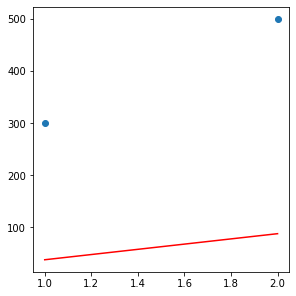

In [203]:
w = 50
b = -12
fun = w*x_train+b 
fig, ax = plt.subplots (1,1,constrained_layout=True, figsize=(4,4))
ax.scatter( x_train, y_train)
ax.plot (x_train, fun, c= 'red' )

In [211]:
w = 0
b = 0
itr = 100
alpha = 0.1
w_final, b_final, all_cost, all_features = gradient_descent (x_train, y_train,w,b,itr, alpha, cost_function, calcule_gradient)
print (w_final,b_final)

i = 0  ,Cost = 46237.5 , (w,b) =((65.0, 40.0))
194.92334898582195 108.2141938899617


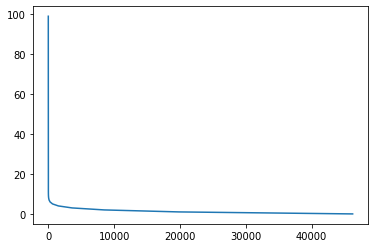

In [216]:
# plot the loss function 
plt.plot (all_cost, np.arange(itr))

Now we plot the data with the parameter finded by the gradient descent $(w\_final, b\_final)$

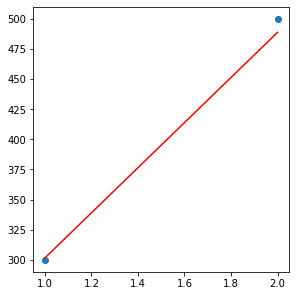

In [210]:
fun = w_final*x_train+b_final 
fig, ax = plt.subplots (1,1,constrained_layout=True, figsize=(4,4))
ax.scatter( x_train, y_train)
ax.plot (x_train, fun, c= 'red' )

### 2) Linear regreassion with multiple variable

> Linear regression with multiple variables is the same as one variable, the only think that is variate is the numbre of feature. \
We can represent the training example as a matrix as fallowing:\
\
$$\mathbf{X} = 
\begin{pmatrix}
 x^{(0)}_0 & x^{(0)}_1 & \cdots & x^{(0)}_{n-1} \\ 
 x^{(1)}_0 & x^{(1)}_1 & \cdots & x^{(1)}_{n-1} \\
 \cdots \\
 x^{(m-1)}_0 & x^{(m-1)}_1 & \cdots & x^{(m-1)}_{n-1} 
\end{pmatrix}
$$ \
And the parameters $w_{i}$ varaiate with the number of features $n-1$ \
\
$$\mathbf{w} = \begin{pmatrix}
w_0 \\ 
w_1 \\
\cdots\\
w_{n-1}
\end{pmatrix}
$$ \
Finally, we can represent the hypothesis/function as follow:\
$$ f_{\mathbf{w},b}(\mathbf{x}) =  w_0x_0 + w_1x_1 +... + w_{n-1}x_{n-1} + b $$ \
or in vector notation: \
$$ f_{\mathbf{w},b}(\mathbf{x}) = \mathbf{w} \cdot \mathbf{x} + b  $$ 
where $\cdot$ is a vector `dot product`




2.1) **computing cost** \
> The equation for the cost function with multiple variables $J(\mathbf{w},b)$ is:
$$J(\mathbf{w},b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})^2 $$ 
where:
$$ f_{\mathbf{w},b}(\mathbf{x}^{(i)}) = \mathbf{w} \cdot \mathbf{x}^{(i)} + b $$  \
\
$\mathbf{w}$ and $\mathbf{x}^{(i)}$ are vectors rather than scalars supporting multiple features.

In [41]:
def cost_function_2 (x,y,w,b):
  m = x.shape[0]
  cost = 0.
  for i in range (m):
    fun = np.dot(x[i],w) + b  #hypothesis
    err = fun - y[i]
    cost = cost + err**2
  cost = 1/ (2*m) * cost
  return cost

2.2) **Gradient descent** \
> Gradient descent for multiple linear is the same as the one variable, we change only the hypothesis function to vector. \
We follow the same step as in one varialbe, implementing function to calculate gradient `compute_gradient_2` and so create our function gradient descent `gradient_descent_2`.

In [59]:
def compute_gradient_2 (x,y,w,b):
  m,n = x.shape
  w_i = np.zeros((n,))
  b_i = 0.

  for i in range (m):
    fun = np.dot(x[i],w) + b
    err = fun - y[i]

    for j in range (n):
      w_i[j] = w_i[j] + err*x[i,j]
      
    b_i = b_i + err

  w_i = w_i/m
  b_i = b_i/m

  return w_i,b_i

In [60]:

def gradient_descent_2 (x,y,w,b,itr,alpha, cost_function, compute_gradient):

  cost_history = []
  w_i = w
  b_i = b
  
  for i in range (itr):
    w_g, b_g = compute_gradient (x,y,w_i,b_i)

    w_i = w_i - alpha * w_g
    b_i = b_i - alpha * b_g

    cost_history.append((cost_function(x,y,w_i,b_i)))

    # print the cost and the paramter over iteration i
    if i%1000 == 0:
      print (f"i = {i}  ,Cost = {cost_history[-1]}")

  return w_i, b_i, cost_history

2.3) **Testing**


In [44]:
# generate data for testing
x_train = np.array([[2104, 5, 1, 45], [1416, 3, 2, 40], [852, 2, 1, 35]])
y_train = np.array([460, 232, 178])
print(x_train,"\n")
print (y_train)

[[2104    5    1   45]
 [1416    3    2   40]
 [ 852    2    1   35]] 

[460 232 178]


In [45]:
# dimension of X_train and y_train
print ('shape of x_train :', x_train.shape)
print ('shape of y_train :', y_train.shape)


shape of x_train : (3, 4)
shape of y_train : (3,)


In [76]:
# initialize parameters
w = np.array([0.,0.,0., 0.])
b = 0.
iterations = 10
alpha = 5.0e-7
# run gradient descent 
w_final, b_final, all_cost = gradient_descent_2(x_train, y_train, w, b,iterations,alpha,cost_function_2, compute_gradient_2)

i = 0  ,Cost = 2529.46295223163


In [77]:
w_final, b_final

(array([2.02184672e-01, 4.98191696e-04, 4.85540318e-05, 4.39075551e-03]),
 9.93447426134968e-05)

In [78]:
print(f"b,w found by gradient descent: {b_final:0.2f},{w_final} ")


b,w found by gradient descent: 0.00,[2.02184672e-01 4.98191696e-04 4.85540318e-05 4.39075551e-03] 


In [79]:
m,_ = x_train.shape
for i in range(m):
    print(f"prediction: {np.dot(x_train[i], w_final) + b_final:0.2f}, target value: {y_train[i]}")

prediction: 425.60, target value: 460
prediction: 286.47, target value: 232
prediction: 172.42, target value: 178


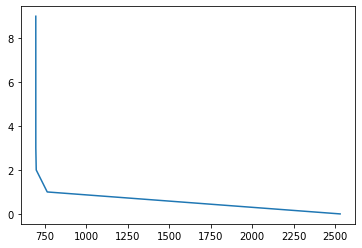

In [80]:
# plot the loss function
plt.plot (all_cost, np.arange (iterations) )